In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the libraries 

In [2]:
import tensorflow as tf
from tensorflow import keras 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import optimizers

## Importint the datasets


In [3]:
training_dir = '/content/drive/MyDrive/tensorflow/cat vs dog/cats_and_dogs/train'
test_dir = '/content/drive/MyDrive/tensorflow/cat vs dog/cats_and_dogs/test'
validate_dir = '/content/drive/MyDrive/tensorflow/cat vs dog/cats_and_dogs/validation'

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)

validate_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    training_dir, 
    target_size = (150,150), 
    class_mode = 'binary',
    batch_size = 20
)

validate_generator = validate_datagen.flow_from_directory(
    validate_dir,
    target_size =(150,150),
    class_mode = 'binary',
    batch_size = 20

)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Buliding the model

In [5]:
model = models.Sequential([
                          
                          keras.layers.Conv2D(32,(3,3),activation='relu',input_shape = (150,150,3)),
                          keras.layers.MaxPool2D(2,2),
                          
                          keras.layers.Conv2D(62,(3,3),activation='relu'),
                          keras.layers.MaxPool2D(2,2),
                           
                          keras.layers.Conv2D(128,(3,3),activation='relu'),
                          keras.layers.MaxPool2D(2,2),
                          
                          keras.layers.Conv2D(128,(3,3),activation='relu'),
                          keras.layers.MaxPool2D(2,2),

                          keras.layers.Flatten(),
                          #keras.layers.Dropout((0.5)),
                          keras.layers.Dense(512,activation='relu'),
                          keras.layers.Dense(1,activation='sigmoid')
                          
]
    
)

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 62)        17918     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 62)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       71552     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [7]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

## Training the model 

In [8]:
trained_model = model.fit(train_generator,validation_data=validate_generator,steps_per_epoch=100,epochs=100,validation_steps=50)

Epoch 1/100
100/100 [==============================] - 735s 7s/step - loss: 0.6931 - acc: 0.5230 - val_loss: 0.6800 - val_acc: 0.5120
Epoch 2/100
100/100 [==============================] - 11s 109ms/step - loss: 0.6616 - acc: 0.6190 - val_loss: 0.6499 - val_acc: 0.6310
Epoch 3/100
100/100 [==============================] - 11s 107ms/step - loss: 0.6246 - acc: 0.6525 - val_loss: 0.6272 - val_acc: 0.6610
Epoch 4/100
100/100 [==============================] - 11s 107ms/step - loss: 0.5807 - acc: 0.7030 - val_loss: 0.6115 - val_acc: 0.6720
Epoch 5/100
100/100 [==============================] - 11s 106ms/step - loss: 0.5427 - acc: 0.7275 - val_loss: 0.5850 - val_acc: 0.6940
Epoch 6/100
100/100 [==============================] - 11s 115ms/step - loss: 0.5094 - acc: 0.7530 - val_loss: 0.5809 - val_acc: 0.6890
Epoch 7/100
100/100 [==============================] - 11s 113ms/step - loss: 0.4823 - acc: 0.7765 - val_loss: 0.5838 - val_acc: 0.7040
Epoch 8/100
100/100 [=============================

## Visualising the training

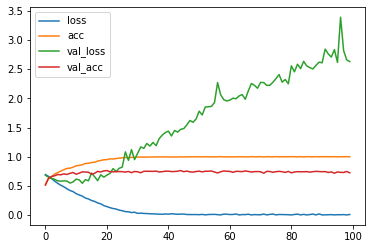

In [9]:
pd.DataFrame(trained_model.history).plot()

## Evaluating the 

In [10]:


test_generator = validate_datagen.flow_from_directory(
    test_dir,
    target_size =(150,150),
    class_mode = 'binary',
    batch_size = 20

)

Found 1010 images belonging to 2 classes.


In [11]:
model.evaluate(test_generator,steps =50)

50/50 [==============================] - 231s 5s/step - loss: 2.6658 - acc: 0.7290


[2.6658072471618652, 0.7289999723434448]

## Saving Model

In [12]:
model.save('/content/drive/MyDrive/tensorflow/Untitled Folder/v1.h5')